# kNN classifier example in Python from scratch

### Table of Contents
1. Introduction
2. About the data
3. Building out the kNN framework
4. Applying the kNN algorithm to our dataset
5. Pros&Cons
6. Next steps

## 1. Introduction

### Classification
kNN is one of the most popular and simplest algorithms used to solve a classification problem. In machine learning, the classification is a problem of identifying which category an object belongs to, based on a training dataset that contains observations with known category membership.

The classification is an example of supervised learning. It means that the training data includes solutions called labels, classes, categories or decisions. 

Examples of classification tasks:
* spam filter, 
* disease detection, 
* image/video recognition,
* document classification, 
* handwriting recognition and many others.

Formally, we want to find the relationship between the data and the label in the given dataset of observation. This relationship is defined by a function **$f: X -> Y$**, where: 

* $X$ is a set of unseen observations $x$. The components $x_{i}$  of the input vector are called features - an individual measurable property of the observed phenomenon.
* $Y$ is a set of predefined classes.
* $f(x)$ is a classifier that assigns a class to each observation from $X$.

The classification task is broken down into two steps:
1. Training step. Based on input training data, the classification model is built.
2. Classification step. For an unlabeled observation, the classifier returns the predicted label.

Suppose we take a large number of men and women and measure their height and weight. We plot the results in the diagram below. The question is, do we think the last observation, marked by a circle, is a woman or a man?

<div>
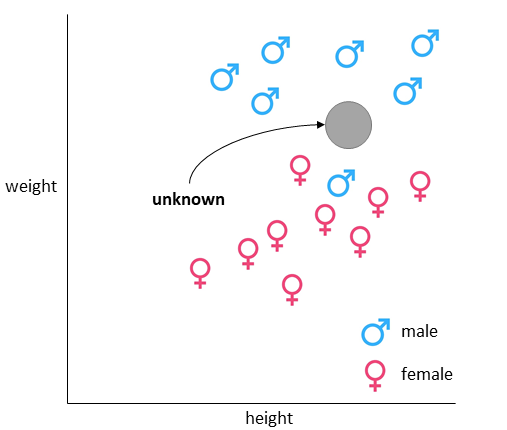
</div>

### kNN algorithm

k-NN is instance-based learning (lazy learning), where new data points are compared to known data points instead of building the predictive model. A new input point is classified in the category such that it has the most number of neighbors from that category.

The kNN-algorithm consists of three steps:
1. Calculating the distance between a test set and the training set. The most common is the Euclidean distance. 
2. Finding the nearest neighbours on the distance criterion.
3. Classifying point from the test set. The predicted class of test point is set equal to the most frequent class among k nearest training points.

### Choosing the value of k

There is no structured rules to choose the value of k but its worth to remember that:
1. In practice, we use the value of k equal to sqrt(N) where N is r the number of samples in your training dataset.
2. A too low value of k makes the prediction less stable and more sensitive to outstanding points.
3. A too large value of k makes the prediction more accurate but increases the bias.
4. Usually, we take k odd for tie-breaking in case the distance measure return an equal number of frequencies for various classes.

The choice of the value of k has a huge impact on the prediction.

<div>
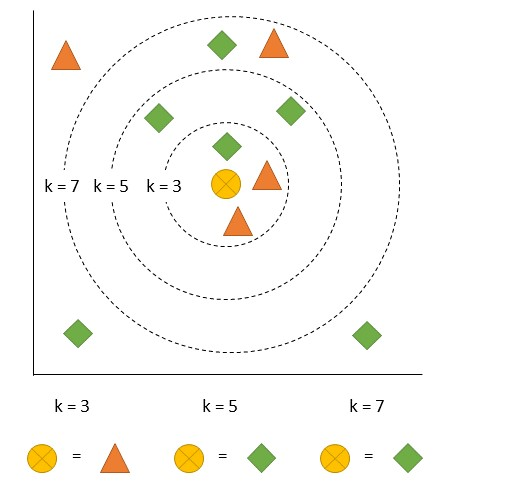
</div>

### Choosing the distance measure

The most common is the Euclidean Distance that measure "ordinary" distance in the straight line between two points or vectors: $d_E(x,y)=\sqrt{∑(x_i−y_i)^2}$


Other popular distance metric is Manhattan Distance: $d_M(x,y)=∑|x_i−y_i|$



<div>
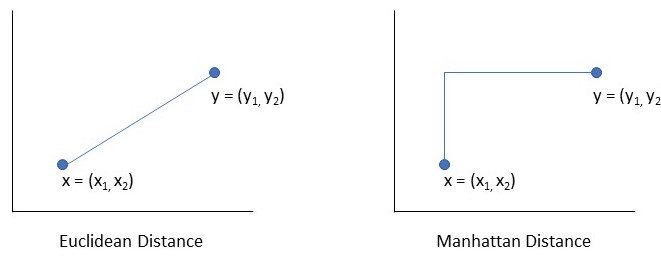
</div>

## 2. About the data

### The Iris flower dataset

The Iris flower data set comes from Ronald Fisher's paper "The use of multiple measurements in taxonomic problems published in 1936. The dataset contains 150 observations of the three species of Iris (50 of Iris setosa, 50 of Iris virginica, 50 of Iris versicolor). Fisher measures four variables from each sample: the length and the width of the sepals and petals, in centimeters. Then, he determined the species membership based on these features combination and developed a linear discriminant model.

The Iris flower dataset is widely used for teaching purposes by beginners in machine learning. In this case, we use this dataset to show how the kNN algorithm works.

For the irises, the classification problem is to learn how to decide whether a new iris flower is setosa, versicolor, or virginica, given its sepal length and width and petal length and width. 

*data source:* https://www.kaggle.com/uciml/iris


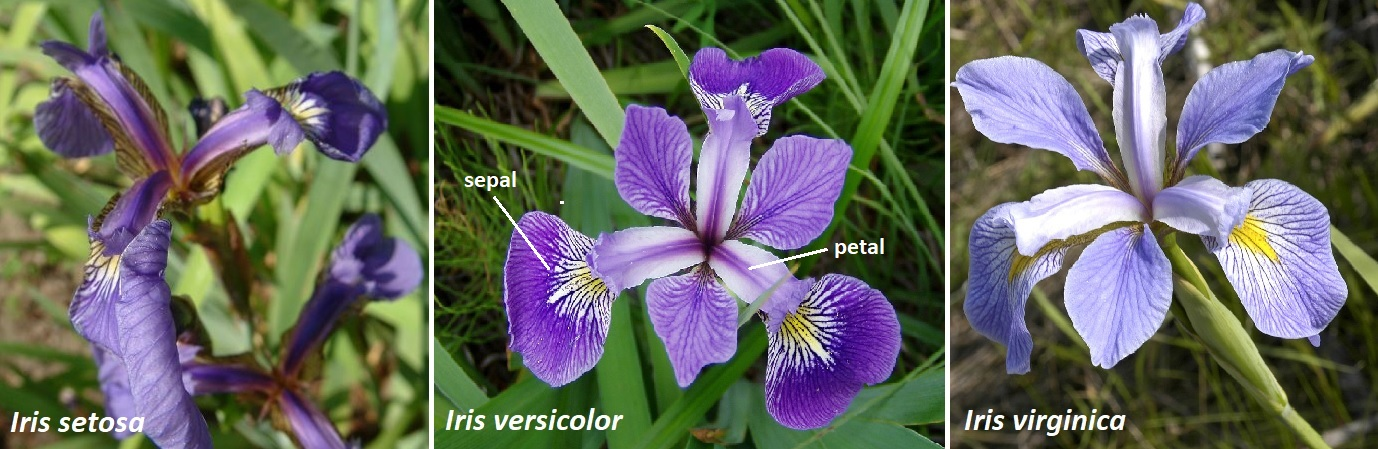

### Quick look into the data

Let's start by looking at the `info()` that shows the basic details of each column available. Now we are analyzing the training dataset - randomly chosen 136 observation from the Iris flower data set.

In [27]:
import pandas as pd
df = pd.read_csv("data/training_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  136 non-null    float64
 1   SepalWidth   136 non-null    float64
 2   PetalLength  136 non-null    float64
 3   PetalWidth   136 non-null    float64
 4   Species      136 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.4+ KB


Then, we use `describe()` to look at descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [14]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,136.000000,136.000000,136.000000,136.000000
mean,5.854412,3.055147,3.786029,1.211765
std,0.814213,0.445192,1.753438,0.759050
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Remember about loading modules `matplotlib` and `seaborn` that are useful in visualization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=UserWarning)
%matplotlib inline

Let's take a look at the distribution to find some patterns.

<Figure size 432x288 with 0 Axes>

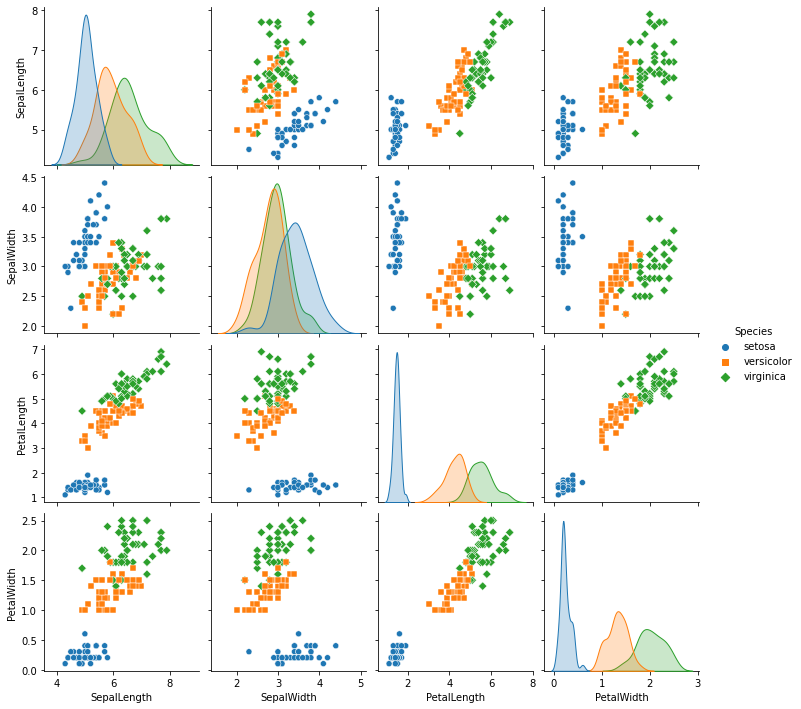

In [29]:
plt.figure()
sns.pairplot(df, hue = "Species", markers=["o", "s", "D"])
plt.show()

<Figure size 432x288 with 0 Axes>

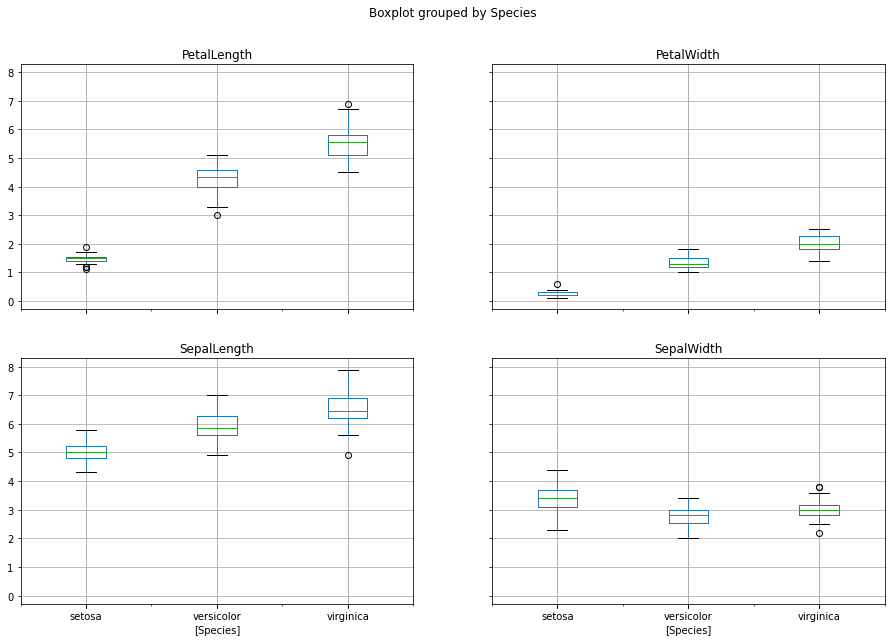

In [17]:
plt.figure()
df.boxplot(by="Species", figsize=(15, 10))
plt.show()

## 3. Building out the kNN framework

Let's start by importing the necessary modules.

In [18]:
import pandas as pd
from math import sqrt

We define class Point.The object of `class Point` has two attributes coordinates and label. 

Then, we define a method that calculates the distance between the test point and all other points in the training set.

In [19]:
class Point:
    
    def __init__(self, coordinates, label):
        self.coordinates = coordinates
        self.label = label
    
    def get_coordinates(self):
        return self.coordinates
    
    def get_label(self):
        return self.label
    
    def distance(self, point):
        return sqrt(sum([(x - y) ** 2 for x, y in zip(self.coordinates, point.coordinates)]))
    
    def __str__(self):
        return str(self.coordinates) + " " + str(self.label)

In the init function we define the value of hyperparameter k (the number of nearest neighbors). Choosing the value of k is not a part of the learning process. We've set `k=3`.

The kNN algorithm does not build any model with the training set. We store the training sample to use it in the prediction stage.

The method `classify` create the list that stores the k nearest neigbours. Then, we create a list of labels for neigbours and choose the most frequent class label among the k closest neigbours.

In [20]:
class Model:
    
    def __init__(self, k=3):
        self.training_set = None
        self.k = k
    
    def train(self, training_set):
        self.training_set = training_set
    
    def classify(self, test_set):
        
        res = []
        
        for point in test_set:
            neighbours = sorted(self.training_set, key = lambda x: x.distance(point))[0:self.k]
            labels = [x.label for x in neighbours]
            prediction = max(labels, key = labels.count)
            res += [(point, prediction)] 
        return res


Finally, we construct the confusion matrix to check the performance of the algorithm. Each row of the matrix represents the instances in a predicted class and each column represents the instances in an actual class.

In [21]:
class ConfusionMatrix:
    
    def __init__(self, predictions):
        self.predictions = predictions
        
    def __str__(self):
        
        rows = sorted(set([x[0].label for x in self.predictions]))
        columns = sorted(set([x[1] for x in self.predictions]))
        column_width = 10
        
        res = " ".join([str(x).center(column_width) for x in columns]) + "\n"
        for row in rows:
            for column in columns:
                res += str(sum([1 for x in self.predictions if x[0].label == row and x[1] == column])).center(column_width)
                res += " "
            res += str(row).center(column_width) + "\n"
        return res
            

## 4. Applying the kNN algorithm to our dataset

Let's test out the model. First, we load two data sets: traing set and test set.

In [22]:
training_set = [Point(x[0:-1], x[-1]) for x in pd.read_csv("data/training_set.csv").values.tolist()]
test_set     = [Point(x[0:-1], x[-1]) for x in pd.read_csv("data/test_set.csv").values.tolist()]

We call `classify` method from `class model`.

In [23]:
model = Model()
model.train(training_set)
predictions = model.classify(test_set)

### Confusion matrix
The confusion matrix shows the performance of our algorithm. Each row  represents the instances in a predicted class and each column represents the instances in an actual class.

In [24]:
print(ConfusionMatrix(predictions))

  setosa   versicolor virginica 
    6          0          0        setosa  
    0          3          1      versicolor
    0          0          4      virginica 



All correct predictions are located on the diagonal of the table. In our case, of the 14 observations, 13 were judged correctly, but of the 4 Irises versicolor, model predicted that 1 was Iris virginica.

### Accuracy

The accuracy of a classification algorithm shows how often the algorithm classifies an observation correctly. Accuracy is the number of correctly predicted observations out of all the observations.

In [25]:
accuracy = sum([1 for i in predictions if i[0].label == i[1]])/len(predictions)

print("Total accuracy: "'{percent:.2%}'.format(percent=accuracy)) 

Total accuracy: 92.86%


## 5. Pros&Cons

Advantages of the kNN algorithm:
1. Very intuitive and easy to implement.
2. Robust to noisy training data.
3. Efficient for large datasets.
4. No initial assumptions for data.

Disadvantages of the kNN algorithm:
1. Choice of the distance measure.
2. Choice of the value of k.
3. High memory usage.

## 6. Next steps

Ideas for further development:
* Change the distance measure
* Add cross-validation